# Gaussian Process Regression Tutorial

This notebook demonstrates Gaussian Process Regression using the `libgp` library. It includes generating synthetic data (`X`, `y`, `y_true`), creating and configuring a Gaussian Process model (`gp`), optimizing hyperparameters using `OptimizerRProp`, making predictions (`mu`, `sig2`), and visualizing results with confidence intervals. Key variables like `X_test`, `params`, and `std` are used throughout the workflow.

## Required Libraries

First, we import the necessary libraries:
- `libgp`: Our Gaussian Process implementation library
- `numpy`: For numerical computations and array operations
- `matplotlib.pyplot`: For visualization of results

In [1]:
import libgp
import numpy as np
import matplotlib.pyplot as plt


## Data Generation

We generate synthetic data for our demonstration:
1. Create input points `X` evenly spaced between 0 and 10
2. Generate true function values `y_true` using a combination of sine wave and linear trend
3. Add Gaussian noise to create noisy observations `y`

This creates a realistic scenario where we have noisy observations of an underlying smooth function.

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y_true = np.sin(X) + 0.3*X
y = y_true + np.random.normal(0, 0.2, X.shape)

## Gaussian Process Model Setup

Here we initialize and configure our Gaussian Process model:
1. Create a GP with 1-dimensional input
2. Use a composite covariance function that combines:
   - Squared exponential (SE) kernel for smoothness
   - Noise kernel to handle observation noise
3. Set initial hyperparameters in log-space
4. Add our training data points to the model

In [3]:
# Create a Gaussian Process with 2D input and squared exponential covariance function
gp = libgp.GaussianProcess(1, "CovSum(CovSEiso, CovNoise)")

# Set the hyperparameters (length scale and signal variance)
params = np.array([0.0, 0.0, -1.0])  # log-space parameters
gp.set_loghyper(params)

gp.add_patterns(X, y)

### Optimizing the Gaussian Process Hyperparameters

The next code block uses the `OptimizerRProp` class to optimize the hyperparameters of the Gaussian Process (`gp`). This step is crucial because the performance of the Gaussian Process depends heavily on the choice of hyperparameters, such as the length scale, signal variance, and noise variance. By maximizing the marginal likelihood of the data, the optimizer adjusts these parameters to improve the model's fit to the observed data (`X` and `y`).

In [4]:
optimizer = libgp.OptimizerRProp()
optimizer.maximize(gp)

## Making Predictions

Now we use our trained GP model to make predictions:
1. Create a finer grid of test points for smooth visualization
2. Get both the mean predictions (`mu`) and variances (`sig2`)

The variance estimates will be used to show the model's uncertainty in its predictions.

In [5]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
mu, sig2 = gp.predict_with_variance(X_test)

## Visualization

Finally, we create a comprehensive plot showing:
- Original noisy data points (blue dots)
- True underlying function (red dashed line)
- GP predictions (green solid line)
- 95% confidence intervals (green shaded area)

This visualization helps us understand how well our GP model has learned the underlying function and where it is most/least confident in its predictions.

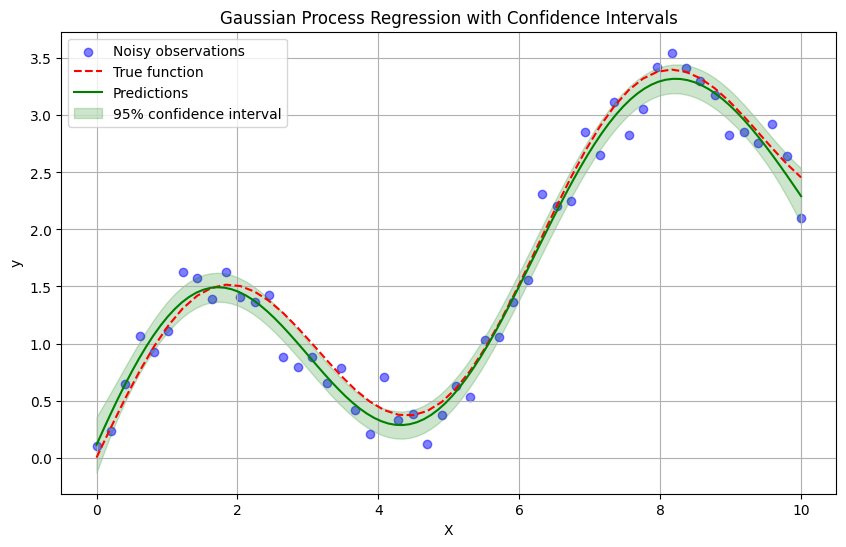

In [6]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Noisy observations')
plt.plot(X, y_true, 'r--', label='True function')
plt.plot(X_test, mu, 'g-', label='Predictions')

# Add confidence intervals (2 standard deviations)
std = np.sqrt(sig2)
plt.fill_between(
    X_test.flatten(), 
    mu - 2*std, 
    mu + 2*std, 
    color='g', 
    alpha=0.2, 
    label='95% confidence interval',
)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()